## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

## NEW UPDATE: Can only use a SUBSET for training and testing (for ALL digits)

In [1]:
#Extract Data Set

from __future__ import print_function
import statistics 

import os
import scipy.io
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

#Import the relevant data using the filepath
Numpyfile= scipy.io.loadmat('mnist_data.mat') 
    #Dictionary 
    
#Display the NumpyFile to check four matrices 
Numpyfile

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Sep 11 18:23:31 2019',
 '__version__': '1.0',
 '__globals__': [],
 'trX': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'trY': array([[0., 0., 0., ..., 1., 1., 1.]]),
 'tsX': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'tsY': array([[0., 0., 0., ..., 1., 1., 1.]])}

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [2]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[333]

8

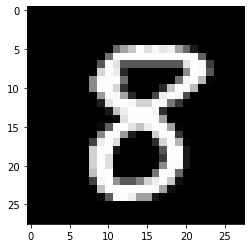

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


(COMPLETED #1): Input size is the size of the image (28x28)

In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [14]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.5002 - accuracy: 0.8492 - val_loss: 0.2070 - val_accuracy: 0.9380
Epoch 2/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2490 - accuracy: 0.9280 - val_loss: 0.1486 - val_accuracy: 0.9570
Epoch 3/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.2012 - accuracy: 0.9414 - val_loss: 0.1244 - val_accuracy: 0.9620
Epoch 4/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.1719 - accuracy: 0.9492 - val_loss: 0.1148 - val_accuracy: 0.9654
Epoch 5/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.1539 - accuracy: 0.9553 - val_loss: 0.1046 - val_accuracy: 0.9689
Epoch 6/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.1445 - accuracy: 0.9570 - val_loss: 0.1038 - val_accuracy: 0.9694
Epoch 7/30
60000/60000 [==============================] - 2s 25us/st

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10425088465235022
Test accuracy: 0.9771999716758728


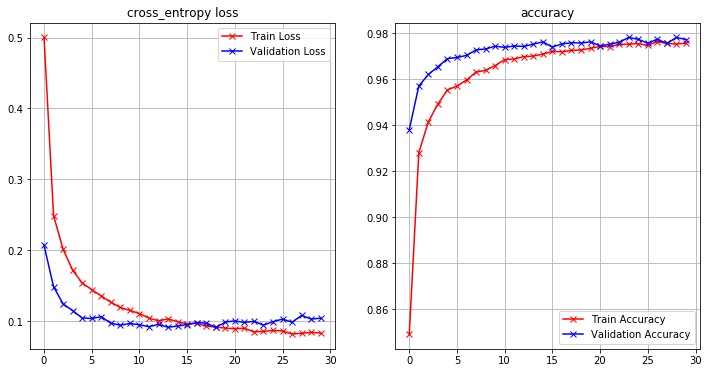

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### -----------------------------------------------------------------------------------------------------------------------------

### Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### (!!!) NOTE THAT WE ARE USING A DIFFERENT MODEL

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Exercise
### Build your own CNN model
Use the Keras "Sequential" functionality to build a convolutional neural network `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build the famous LeNet-5 architecutre and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected1 size: 84
7. How many parameters does your model have?  How does it compare with the previous model?
8. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
9. Plot the loss and accuracy graph for training the new model 
10. Evaluate the model on test data

To use the LeNet model, we need to do some preprocessing of the data first.

**(COMPLETED #1)**: Input size is the size of the image (28x28)

In [17]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [19]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your model below

**(!!!) COMPLETED #2:** 2x2 pooling with stride 1

In [20]:
#(!!!) UNTESTED MODEL
    #is padding invalid by default?
model2 = Sequential()

#CNN LAYER 1
    #6 filters is the STARTING number
        #'valid' padding is no padding
        #Tuple for strides is the same number all throughout
        #Strides have same dimensions as kernel
model2.add(Conv2D(6, kernel_size=(5,5), strides=(1,1),activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#CNN LAYER 2
    #16 filters is the STARTING number
    #'valid' padding is no padding
model2.add(Conv2D(16, kernel_size=(5,5), strides=(1,1),activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Fully Connected
    #NEED activation function at every layer
    #Here, we will always use relu
model2.add(Flatten())
    #Just replace Flatten with Dropout for bonus project
    
"""(!!!) COMPLETED #6: Hidden Layer with 120 nodes, ReLU as activation function""" 
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))
    #Because 10 numbers

In [21]:
#(!!!) UNTESTED COMPILATION
    #20 epochs 
    #With RMSProp 
    #Learning rate of .001 
    #Batch size of 128
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

"""model2.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])"""

#-----------------------------------------------
#(!!!) WILL CHANGE BATCH SIZE AND EPOCH NUMBER
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history2 = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))
#-----------------------------------------------

score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.2689 - accuracy: 0.9173 - val_loss: 0.1080 - val_accuracy: 0.9634
Epoch 2/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0721 - accuracy: 0.9771 - val_loss: 0.0426 - val_accuracy: 0.9859
Epoch 3/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0500 - val_accuracy: 0.9828
Epoch 4/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0386 - val_accuracy: 0.9857
Epoch 5/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0342 - val_accuracy: 0.9883
Epoch 6/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 7/20
60000/60000 [==============================] 

In [22]:
## Note that this model has a LOT of parameters
    #Numbers verified to be correct
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

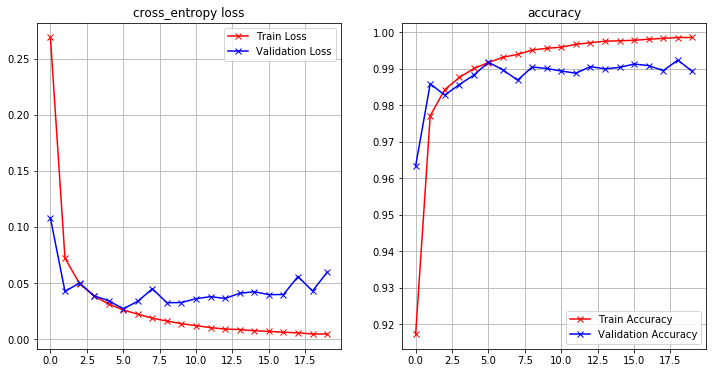

In [23]:
plot_loss_accuracy(history2)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

In [24]:
#QUESTION 1
    #model2 has an overall higher test accuracy and lower test loss than model_1
        #Results for a sample model2 run
            #Test Accuracy: 0.9909999966621399
            #Test Loss: 0.043145432651280353
        #Results for a sample model_1 run
            #Test Accuracy: 0.974399983882904
            #Test Loss: 0.10127111947561498
    
    #I would put model2 into production, because it had more overall test accuracy and lower loss compared to model_1
    #, despite the fact that model1 has higher test accuracy and lower loss than its training counterpart 

In [25]:
#QUESTION 2
    #model_1 has overall lower validation loss and higher validation accuracy
    #In comparison, model2 has lower training loss and higher training accuracy
    
    #It suggests that model_1 would be more accurate in picking up nuances not covered in training data, as it is more "general"
    #It suggests that model2 would be more tightly follow rules picked up in the training data, but be more closed off to nuance
    
    #While both loss and accuracy are important and necesary in producing a good model, in
    #my opinion, loss should be considered more, since an optimal loss is directly responsible for
    #a good model to recognize the nuances of classifying images without overfitting